In [ ]:
# !pip install torchtext==0.6.0
# !pip install torch


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy  as np
import torch
import torchtext as td
import nltk
from torchtext.data import Field , BucketIterator, TabularDataset , LabelField
from nltk import word_tokenize
import torch.nn as nn
import glob
from io import open
import os

In [ ]:
class RNN(nn.Module):

    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):

        super().__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)

        self.rnn = nn.RNN(embedding_dim, hidden_dim)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):

        embedded = self.embedding(text)

        output, hidden = self.rnn(embedded)

        hidden_1D = hidden.squeeze(0)

        assert torch.equal(output[-1, :, :], hidden_1D)

        return self.fc(hidden_1D)

In [ ]:
class RNN1(nn.Module):

    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):

        super().__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)

        self.rnn = nn.LSTM(embedding_dim, hidden_dim)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):

        embedded = self.embedding(text)

        output, (hidden, _) = self.rnn(embedded)

        hidden_1D = hidden.squeeze(0)

        assert torch.equal(output[-1, :, :], hidden_1D)

        return self.fc(hidden_1D)

In [ ]:
class RNN2(nn.Module):

    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):

        super().__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)

        self.rnn = nn.LSTM(embedding_dim, hidden_dim)

        self.fc = nn.Linear(hidden_dim, output_dim)

        self.dropout = nn.Dropout(0.3)

    def forward(self, text):

        embedded = self.embedding(text)

        embedded_dropout = self.dropout(embedded)

        output, (hidden, _) = self.rnn(embedded_dropout)

        hidden_1D = hidden.squeeze(0)

        assert torch.equal(output[-1, :, :], hidden_1D)

        return self.fc(hidden_1D)

In [ ]:
import torch.nn as nn

class RNN3(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):

        super(RNN3, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)

        self.i2o = nn.Linear(input_size + hidden_size, output_size)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)

        hidden = self.i2h(combined)

        output = self.i2o(combined)
        output = self.softmax(output)

        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
print(glob.glob('/content/datasets/*.txt'))

['/content/datasets/Russian.txt', '/content/datasets/Arabic.txt', '/content/datasets/Dutch.txt', '/content/datasets/Japanese.txt', '/content/datasets/Chinese.txt', '/content/datasets/German.txt', '/content/datasets/French.txt', '/content/datasets/Korean.txt', '/content/datasets/Vietnamese.txt', '/content/datasets/Czech.txt', '/content/datasets/Irish.txt', '/content/datasets/Polish.txt', '/content/datasets/Italian.txt', '/content/datasets/Scottish.txt', '/content/datasets/Portuguese.txt', '/content/datasets/Greek.txt', '/content/datasets/Spanish.txt', '/content/datasets/English.txt']


In [ ]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [ ]:
n_letters

57

In [ ]:
language_names = {}

all_languages = []

In [ ]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [ ]:
print(unicodeToAscii('Emile'))

Emile


In [ ]:
def findFiles(path) :
  return glob.glob(path)

In [ ]:
total_names = 0

for filename in findFiles('/content/datasets/*.txt'):

    language = os.path.splitext(os.path.basename(filename))[0]

    all_languages.append(language)

    read_names = open(filename, encoding='utf-8').read().strip().split('\n')

    names = [unicodeToAscii(line) for line in read_names]

    language_names[language] = names

    total_names += len(names)


In [ ]:
total_names

20074

In [ ]:
all_languages

['Russian',
 'Arabic',
 'Dutch',
 'Japanese',
 'Chinese',
 'German',
 'French',
 'Korean',
 'Vietnamese',
 'Czech',
 'Irish',
 'Polish',
 'Italian',
 'Scottish',
 'Portuguese',
 'Greek',
 'Spanish',
 'English']

In [ ]:
print(language_names['Korean'][:5])

['Ahn', 'Baik', 'Bang', 'Byon', 'Cha']


In [ ]:
n_languages = len(all_languages)
n_languages

18

In [ ]:
def letter_to_tensor(letter) :
  tensor = torch.zeros(1,n_letters)


  tensor[0][all_letters.find(letter)] = 1

  return tensor

In [ ]:
print(letter_to_tensor('d'))

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [ ]:
def names_to_tensor(name) :
  tensor = torch.zeros(len(name),1,n_letters)

  for li , letters in enumerate(name) :
    tensor[li][0][all_letters.find(letters)] = 1

  return tensor

In [ ]:
names_to_tensor(language_names['Korean'][0])

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])

In [ ]:
names_to_tensor('pilal')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
print(names_to_tensor('pilal').size())

torch.Size([5, 1, 57])


In [ ]:
n_languages = len(all_languages)
n_languages

18

In [ ]:
n_hidden = 256

rnn = RNN3(n_letters , n_hidden , n_languages )

In [ ]:
inp = letter_to_tensor('C')

hidden = torch.zeros(1,n_hidden)

output , nextHidden = rnn(inp , hidden)

print('the output size : ' , output.size())

print('the next_hidden size : ' , nextHidden.size())

the output size :  torch.Size([1, 18])
the next_hidden size :  torch.Size([1, 256])


In [ ]:
inp = names_to_tensor("charron")

hidden = torch.zeros(1 , n_hidden)


output , nextHidden = rnn(inp[0] , hidden)

In [ ]:
print(output)

tensor([[-2.8220, -2.9089, -2.9483, -2.8629, -2.7906, -2.8584, -2.9526, -2.9756,
         -2.8337, -2.9035, -2.8394, -2.9262, -2.9165, -2.9429, -2.9285, -2.8194,
         -2.8652, -2.9591]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
def languageFromOutput(output):

    _, top_i = output.topk(1)

    language_i = top_i[0].item()

    return all_languages[language_i], language_i

In [ ]:
print(languageFromOutput(output))

('Chinese', 4)


In [ ]:
import random

def randomTrainingExample():

    random_language_index = random.randint(0, n_languages - 1)
    language = all_languages[random_language_index]

    random_language_names = language_names[language]

    name = random_language_names[random.randint(0, len(random_language_names) - 1)]

    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
    name_tensor = names_to_tensor(name)

    return language, name, language_tensor, name_tensor

In [ ]:
for i in range(10):
    language, name, language_tensor, name_tensor = randomTrainingExample()

    print('language =', language, ', name =', name)

language = Dutch , name = Roijackers
language = Greek , name = Geracimos
language = Irish , name = O'Neal
language = Spanish , name = Toset
language = Spanish , name = Robledo
language = Vietnamese , name = Thach
language = Polish , name = Sokolowski
language = Chinese , name = Thian
language = Italian , name = Biondo
language = German , name = Bretz


In [ ]:
criterion = nn.NLLLoss()
learning_rate = 0.005

In [ ]:
def train(langauge_tensor, name_tensor):

    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, langauge_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [ ]:
n_iters = 200000

current_loss = 0
all_losses = []

In [ ]:
for epoch in range(1, n_iters + 1):

    language, name, language_tensor, name_tensor = randomTrainingExample()

    output, loss = train(language_tensor, name_tensor)
    current_loss += loss

    if epoch % 5000 == 0:
        guess, guess_i = languageFromOutput(output)
        correct = '✓' if guess == language else '✗ (%s)' % language

        print('%d %d%% %.4f %s / %s %s' % (epoch,
                                           epoch / n_iters * 100,
                                           loss,
                                           name,
                                           guess,
                                           correct))

    if epoch % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

5000 2% 2.9509 Hughes / Arabic ✗ (Scottish)
10000 5% 2.8114 Ross / German ✗ (Scottish)
15000 7% 2.0279 Vazquez / Spanish ✓
20000 10% 1.8482 Lagorio / Portuguese ✗ (Italian)
25000 12% 2.5457 Curtis / Greek ✗ (English)
30000 15% 0.2038 Charoshnikov / Russian ✓
35000 17% 0.8311 Bello / Italian ✓
40000 20% 2.8113 Entler / German ✗ (Czech)
45000 22% 1.5925 Sum / Korean ✗ (Chinese)
50000 25% 1.2575 Starek / Czech ✗ (Polish)
55000 27% 1.3102 Daviau / French ✓
60000 30% 0.8928 Paschalis / Russian ✗ (Greek)
65000 32% 1.4574 StrakaO / Czech ✓
70000 35% 0.6035 Armati / Italian ✓
75000 37% 0.0362 Emyashev / Russian ✓
80000 40% 1.1207 Delgado / Spanish ✗ (Portuguese)
85000 42% 0.8234 Mikhin / Russian ✓
90000 45% 2.2490 Russell / Dutch ✗ (Scottish)
95000 47% 1.5573 Bitar / Scottish ✗ (Arabic)
100000 50% 7.7339 Shamota / Japanese ✗ (Russian)
105000 52% 0.0140 Krakowski / Polish ✓
110000 55% 0.8671 Muhlfeld / German ✓
115000 57% 0.1306 Naomhan / Irish ✓
120000 60% 0.2450 Si / Korean ✓
125000 62% 4.395

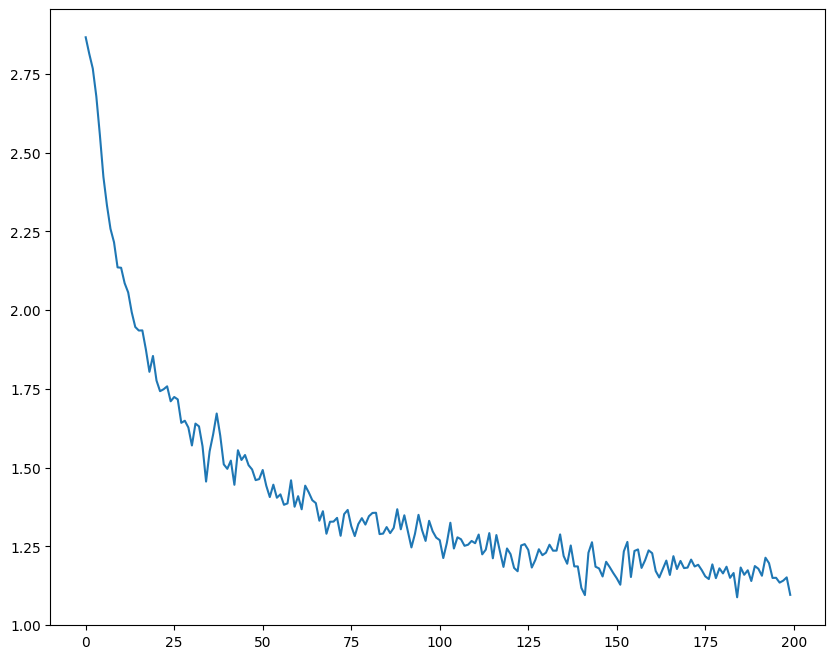

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(all_losses)
plt.show()

In [ ]:
n_predictions = 3

In [ ]:
input_name = 'mohammad' #Re-run for 'Amaya' and 'Bukoski'

In [ ]:
with torch.no_grad():

    name_tensor = names_to_tensor(input_name)

    hidden = rnn.initHidden()
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    topv, topi = output.topk(n_predictions, 1, True)

    for i in range(n_predictions):

        value = topv[0][i].item()
        language_index = topi[0][i].item()

        print('(%.2f) %s' % (value, all_languages[language_index]))

(-0.55) Arabic
(-1.93) Japanese
(-2.24) German
